### Logistic Regression

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [7]:
x = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)
x, y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.1],
        [0.2],
        [0.4],
        [0.4],
        [0.3],
        [0.3],
        [0.3],
        [0.2],
        [0.4],
        [0.2],
        [0.5],
        [0.2],
        [0.2],
        [0.4],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.1],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.3],
        [0.3],
        [0.2],
        [0.6],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4],
        [1. ],
        [1.5],
        [1. ],
        [1.4],
        [1.3],
        [1.4],
        [1

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[0, 3, -0.02, 1.02]

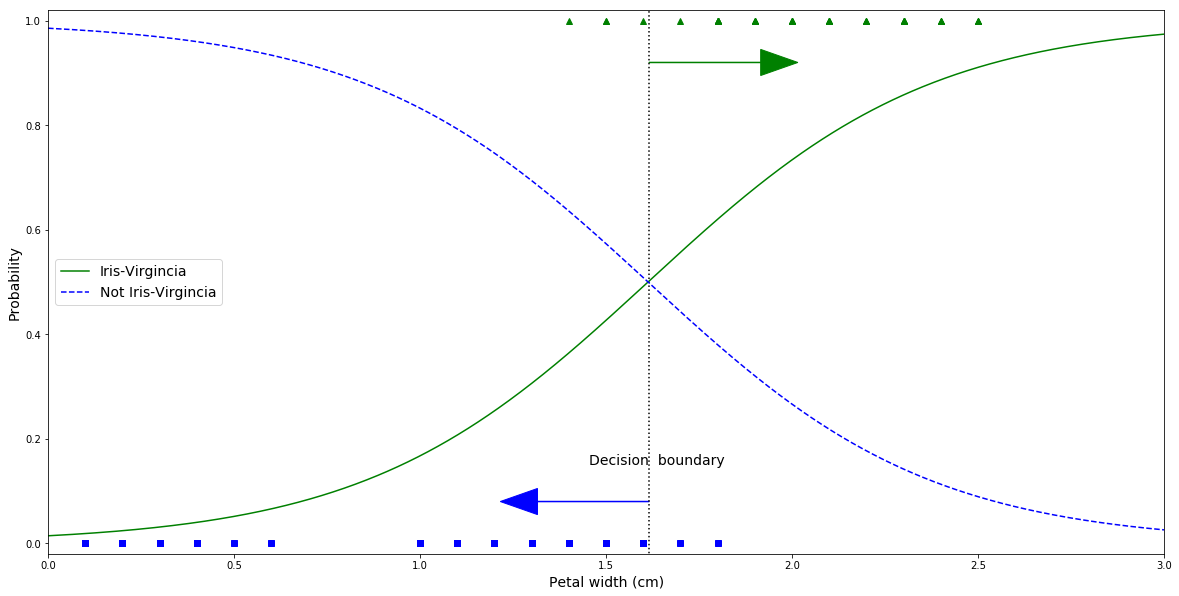

In [20]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(20, 10))
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:")
plt.plot(x_new, y_proba[:, 1], 'g-', label='Iris-Virgincia')
plt.plot(x_new, y_proba[:, 0], 'b--', label='Not Iris-Virgincia')
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
plt.axis([0, 3, -0.02, 1.02])

In [21]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

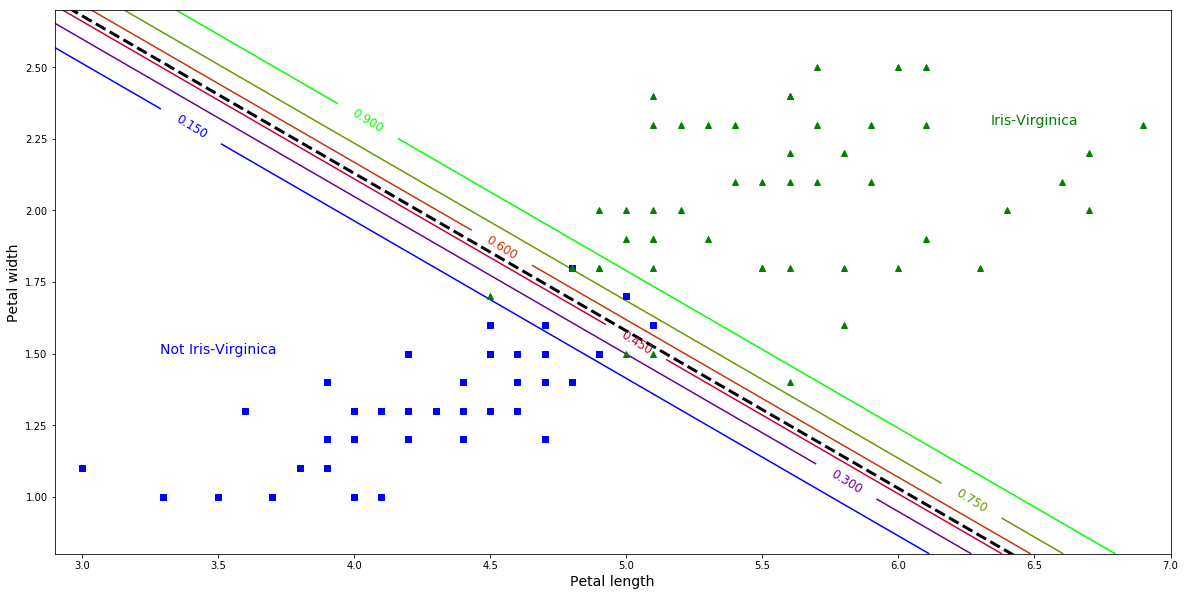

In [40]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(20, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [48]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

((200, 500), (200, 500))